<a href="https://colab.research.google.com/github/aenako/Mudah.my/blob/main/Group_Project_DS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GROUP DS5**<BR>
**LUQMAN AMZARI BIN ANIS HILMI**<BR>
**DANISH DEAN BIN NOOR SALLAHUDDIN**<BR>
**AINA NASUHA BINTI ISMAIL ZAKRI**<BR>
**NUR IZZATI BINTI RASMAN**


### **EXTRACTING DATA ATTRIBUTES**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of URLs to scrape
urls = [
    'https://www.mudah.my/malaysia/cars-for-sale?page=1',
    'https://www.mudah.my/malaysia/cars-for-sale?page=2',
    'https://www.mudah.my/malaysia/cars-for-sale?page=3'
]

# Headers to mimic a real browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36'
}

# Lists to store scraped data
product_names = []
manufacturing_years = []
prices = []
times_dates = []
conditions = []
regions = []
mileages = []
engine_capacities = []

# Loop through each page
for url in urls:
    # Send HTTP GET request
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract all product listings
    listings = soup.find_all('div', {'data-testid': lambda x: x and x.startswith('listing-ad-item')})

    for listing in listings:
        # Extract product name
        product_name = listing.find('div', {'class': 'flex flex-col'})  # Assuming car name is in <h2>
        product_names.append(product_name.text.strip() if product_name else "N/A")

        # Manufacturing Year
        year = listing.find('div', {'class': 'rounded flex items-center gap-1 py-0.5 pr-1 pl-0.5 w-max'})
        if not year:
           year = listing.find('div', {'title': 'Manufactured Year'})
        manufacturing_years.append(year.text.strip() if year else "N/A")


        # Extract price
        price = listing.find('div', {'class': 'text-sm text-[#E21E30] font-bold'})  # Replace with actual class
        prices.append(price.text.strip() if price else "N/A")

        # Extract time & date posted
        time_date = listing.find('span', string=True)
        times_dates.append(time_date.text.strip() if time_date else "N/A")

        # Extract condition (New/Used)
        condition = listing.find('div', {'title': 'Condition'})
        conditions.append(condition.text.strip() if condition else "N/A")

        # Extract region
        region = listing.find('span', {'title': 'Region'})
        regions.append(region.text.strip() if region else "N/A")

        # Extract mileage
        mileage = listing.find('div', {'title': 'Mileage'})  # Replace with actual class
        mileages.append(mileage.text.strip() if mileage else "N/A")

        # Extract engine capacity
        engine_capacity = listing.find('div', {'title': 'Engine capacity'})  # Replace with actual class
        engine_capacities.append(engine_capacity.text.strip() if engine_capacity else "N/A")

# Create a DataFrame with the extracted data
df = pd.DataFrame({
    "Product Name": product_names,
    "Manufacturing Year": manufacturing_years,
    "Price": prices,
    "Time & Date Posted": times_dates,
    "Condition": conditions,
    "Region": regions,
    "Mileage": mileages,
    "Engine Capacity (cc)": engine_capacities
})

# Save the DataFrame to a CSV file
df.to_csv('mudah_raw.csv', index=False)

# Display the DataFrame
print("DataFrame saved to 'mudah_raw.csv'")

# Display the DataFrame
print("DataFrame:")
df

DataFrame saved to 'mudah_raw.csv'
DataFrame:


,Product Name,Manufacturing Year,Price,Time & Date Posted,Condition,Region,Mileage,Engine Capacity (cc)
0,Proton PREVE 1.6 CFE TURBO LOTUS 400 ONLY INST...,2018,"RM 29,800","Today, 18:18",Used,Selangor,65000 - 69999,1561cc
1,Mitsubishi Triton AUTO 4X4 Baru 184PS DISKAUN ...,2024,"RM 116,980","Today, 18:17",New,Kuala Lumpur,0 - 4999,2442cc
2,Toyota VIOS 1.5 J (A) FREE WARRANTY ONE OWNERR...,2016,"RM 31,888","Today, 18:17",Used,Selangor,85000 - 89999,1497cc
3,Mazda CX-5 2.0 GL 2WD (A) WARRANTY 75K KM FSRR...,2017,"RM 52,888","Today, 18:17",Used,Selangor,70000 - 74999,1998cc
4,Honda ACCORD 2.4 VTi-L LED LAMP 2Y WARRANTYRM ...,2014,"RM 27,888","Today, 18:17",Used,Selangor,65000 - 69999,2356cc
...,...,...,...,...,...,...,...,...
115,"Porsche 911 Carrera S 2023 (HOT UNIT)RM 998,999",2023,"RM 998,999","Today, 18:09",Recon,Selangor,5000 - 9999,2981cc
116,Mitsubishi TRITON 2.4 VGT ADVENTURE(A)PADDLE S...,2016,"RM 59,800","Today, 18:09",Used,Johor,70000 - 74999,2442cc
117,Naza FORTE 1.6 SX ENHANCED (A)CASH NEGO GORM 1...,2013,"RM 13,800","Today, 18:09",Used,Selangor,100000 - 109999,1591cc
118,"PROTON SAGA 1.3 (M) tip top conditionRM 9,800",2014,"RM 9,800","Today, 18:08",Used,Perak,150000 - 159999,1332cc


### **DATA TRANSFORMATION**

**a. DATA PREPROCESSING**

In [ ]:
import pandas as pd
import re

# Load dataset
file_path = "mudah_raw.csv"
df = pd.read_csv(file_path)

# Show data types before any transformation
print("Data types before transformation:")
print(df.dtypes)

# Add a column to store the original product names (before cleaning)
df["Original Product Name"] = df["Product Name"]

# 1. Convert Price to Numeric Format
df["Price"] = df["Price"].str.replace("RM", "").str.replace(",", "").astype(int)

# 2. Extract Numeric Values from Engine Capacity
df["Engine Capacity (cc)"] = df["Engine Capacity (cc)"].str.replace("cc", "").astype(int)

# 3. Standardize Product Name (Remove extra spaces, capitalize each word, and remove unwanted words)
unwanted_words = ["rm", "(A)", "(M)", "New", "Used", "Recon", "Warranty", "promotion", "sale", "warranty", "mileage", "kit", "stock", "seat", "offer", "year end sales", "facelift"]
df["Product Name"] = df["Product Name"].str.strip().apply(lambda x: ' '.join([word.capitalize() for word in x.split() if word not in unwanted_words]))

# 4. Handle Missing Values
df["Price"] = df["Price"].fillna(df["Price"].mean())
df["Engine Capacity (cc)"] = df["Engine Capacity (cc)"].fillna(df["Engine Capacity (cc)"].mean())
df["Manufacturing Year"] = df["Manufacturing Year"].fillna(df["Manufacturing Year"].mode()[0])  # Fill with mode for categorical
df["Mileage"] = df["Mileage"].fillna("Unknown")  # Fill missing mileage with a placeholder

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

# Apply the function to the Price and Engine Capacity columns
df = remove_outliers_iqr(df, "Price")
df = remove_outliers_iqr(df, "Engine Capacity (cc)")

# Show data types after transformation
print("\nData types after transformation:")
print(df.dtypes)

# Save processed dataset
df.to_csv("mudah_processed.csv", index=False)

# Display processed data
print(df.head())

Data types before transformation:
Product Name            object
Manufacturing Year       int64
Price                   object
Time & Date Posted      object
Condition               object
Region                  object
Mileage                 object
Engine Capacity (cc)    object
dtype: object

Data types after transformation:
Product Name             object
Manufacturing Year        int64
Price                     int64
Time & Date Posted       object
Condition                object
Region                   object
Mileage                  object
Engine Capacity (cc)      int64
Original Product Name    object
dtype: object
                                        Product Name  Manufacturing Year  \
0  Proton Preve 1.6 Cfe Turbo Lotus 400 Only Inst...                2018   
1  Mitsubishi Triton Auto 4x4 Baru 184ps Diskaun ...                2024   
2  Toyota Vios 1.5 J Free Warranty One Ownerrm 31...                2016   
3  Mazda Cx-5 2.0 Gl 2wd Warranty 75k Km Fsrrm 52...            

In [ ]:
# Display comparison of Original and Standardized Product Names
print("Before and After Standardization of Product Names:")
df[["Original Product Name", "Product Name"]].head()

Before and After Standardization of Product Names:


,Original Product Name,Product Name
1,Toyota NOAH 2.0 Si wxb 2 promosi akhir tahunRM...,Toyota Noah 2.0 Si Wxb 2 Promosi Akhir Tahunrm...
2,Honda HR-V 1.8 E FACELIFT P/Shift FSR57k U/Wrt...,Honda Hr-v 1.8 E Facelift P/shift Fsr57k U/wrt...
3,M Benz CLA180 1.6 AMG C117 F/LIFT CBU JAPAN Re...,M Benz Cla180 1.6 Amg C117 F/lift Cbu Japan Re...
4,"Honda CIVIC 1.5 Turbo FL1 Auto MurahRM 161,000","Honda Civic 1.5 Turbo Fl1 Auto Murahrm 161,000"
5,"Proton SAGA 1.3 BASE LINE (A)RM 6,800","Proton Saga 1.3 Base Line (a)rm 6,800"


**b. DATA VISUALISATION**

Data Visualisation Before Data Cleaning

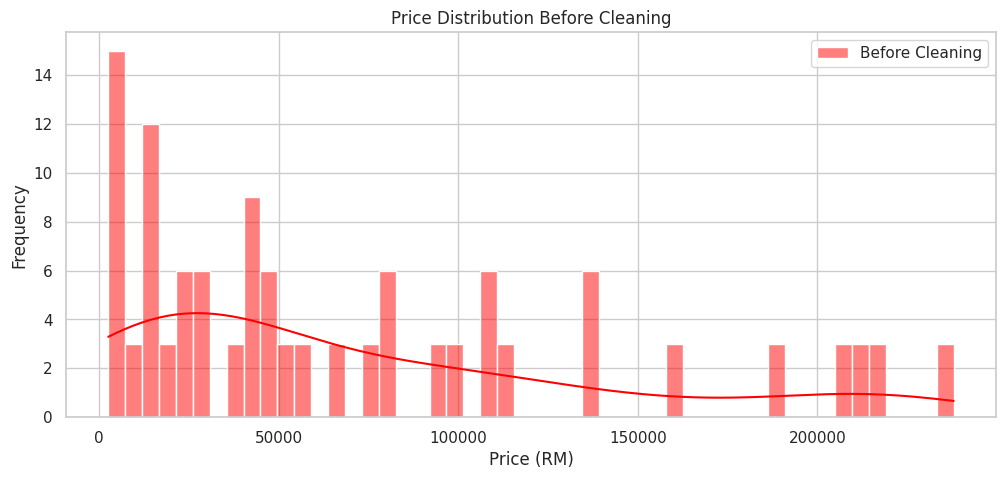

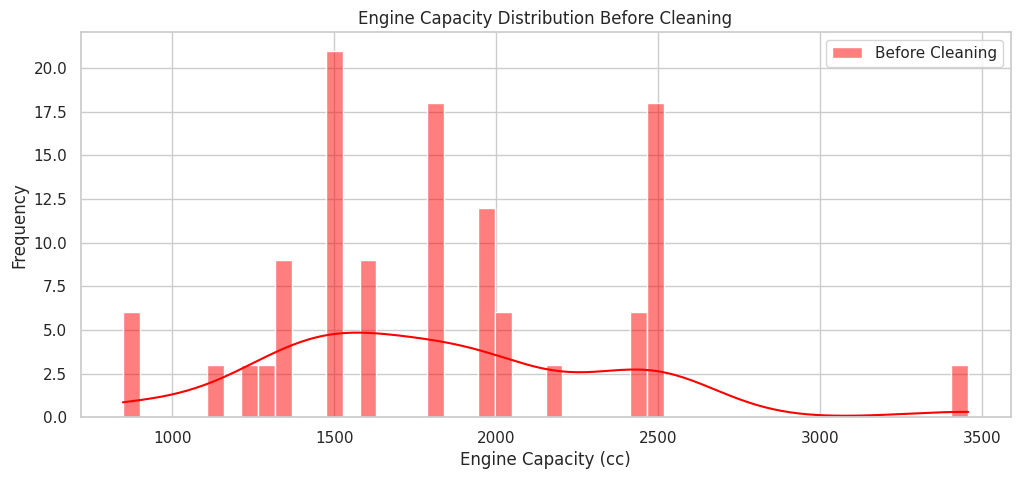

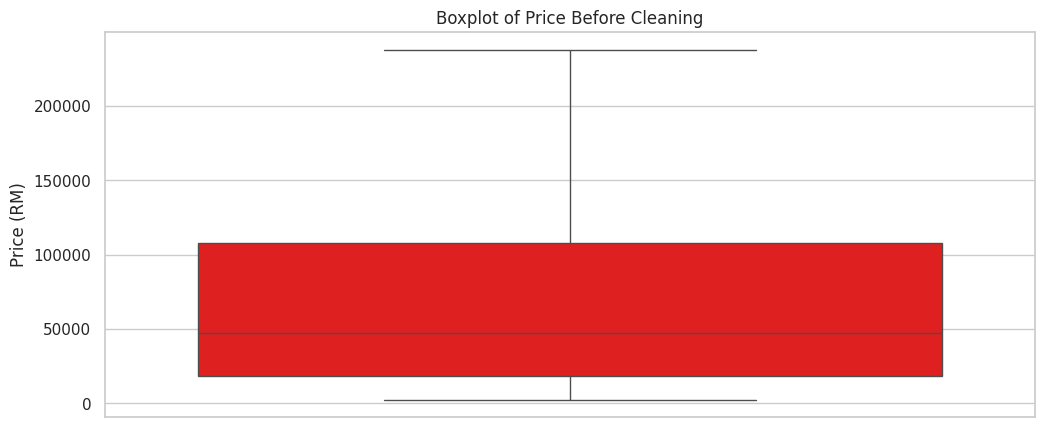

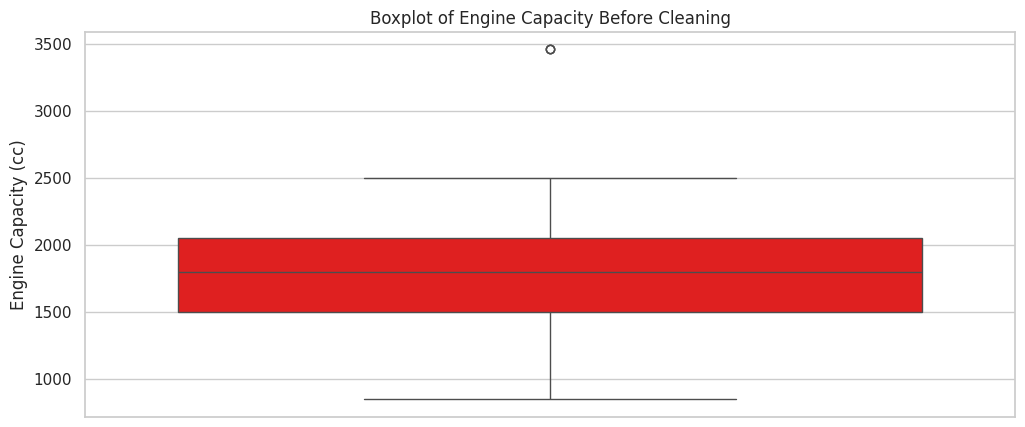

Missing Values Before Cleaning:
Product Name            0
Manufacturing Year      0
Price                   0
Time & Date Posted      0
Condition               0
Region                  0
Mileage                 0
Engine Capacity (cc)    0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Raw Dataset
df_raw = pd.read_csv("mudah_raw.csv")  # Ensure file exists in the working directory

# Convert columns to numeric where applicable (handling errors if non-numeric values exist)
df_raw["Price"] = df_raw["Price"].str.replace("RM", "").str.replace(",", "", regex=True)
df_raw["Engine Capacity (cc)"] = df_raw["Engine Capacity (cc)"].str.replace("cc", "", regex=True)

df_raw["Price"] = pd.to_numeric(df_raw["Price"], errors="coerce")
df_raw["Engine Capacity (cc)"] = pd.to_numeric(df_raw["Engine Capacity (cc)"], errors="coerce")

# 1 Price Distribution Before Cleaning
plt.figure(figsize=(12, 5))
sns.histplot(df_raw["Price"].dropna(), bins=50, color='red', label="Before Cleaning", kde=True)
plt.legend()
plt.title("Price Distribution Before Cleaning")
plt.xlabel("Price (RM)")
plt.ylabel("Frequency")
plt.show()

# 2 Engine Capacity Distribution Before Cleaning
plt.figure(figsize=(12, 5))
sns.histplot(df_raw["Engine Capacity (cc)"].dropna(), bins=50, color='red', label="Before Cleaning", kde=True)
plt.legend()
plt.title("Engine Capacity Distribution Before Cleaning")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Frequency")
plt.show()

# 3 Boxplot of Price Before Cleaning (Shows Outliers)
plt.figure(figsize=(12, 5))
sns.boxplot(df_raw["Price"].dropna(), color='red')
plt.title("Boxplot of Price Before Cleaning")
plt.ylabel("Price (RM)")
plt.show()

# 4 Boxplot of Engine Capacity Before Cleaning
plt.figure(figsize=(12, 5))
sns.boxplot(df_raw["Engine Capacity (cc)"].dropna(), color='red')
plt.title("Boxplot of Engine Capacity Before Cleaning")
plt.ylabel("Engine Capacity (cc)")
plt.show()

# 5 Missing Values Before Cleaning
missing_before = df_raw.isnull().sum()

# Display missing values
print("Missing Values Before Cleaning:")
print(missing_before)


Data Visualisation After Data Cleaning

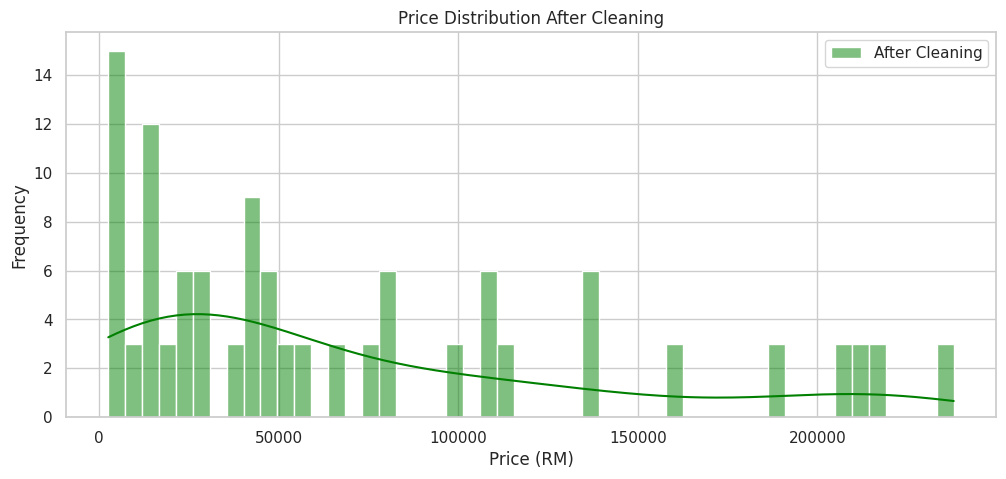

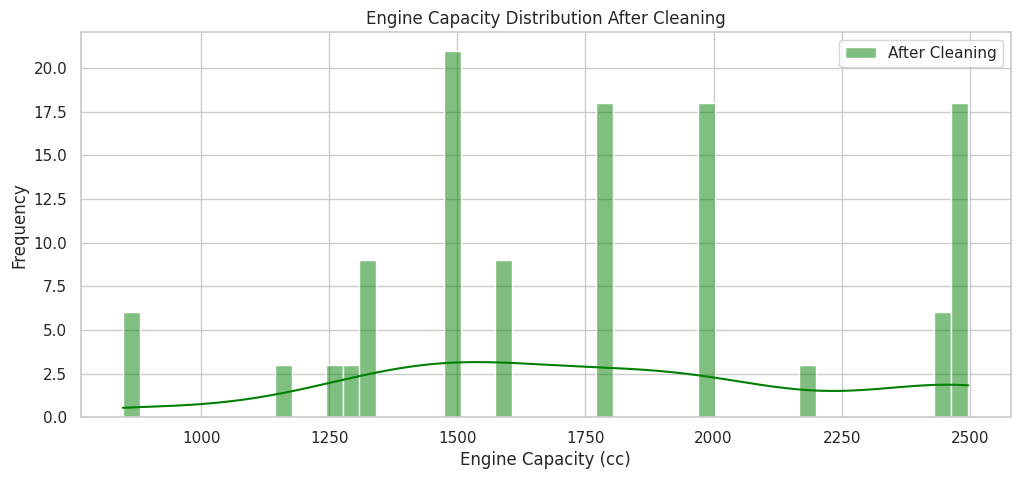

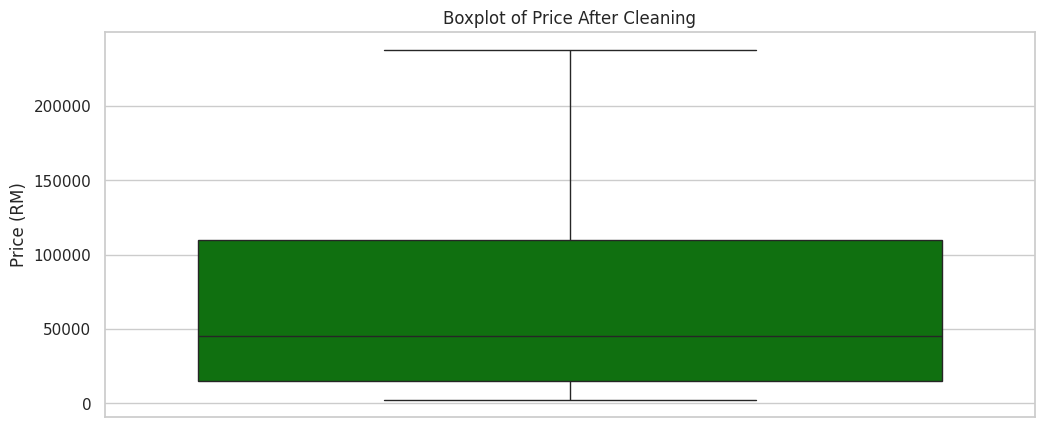

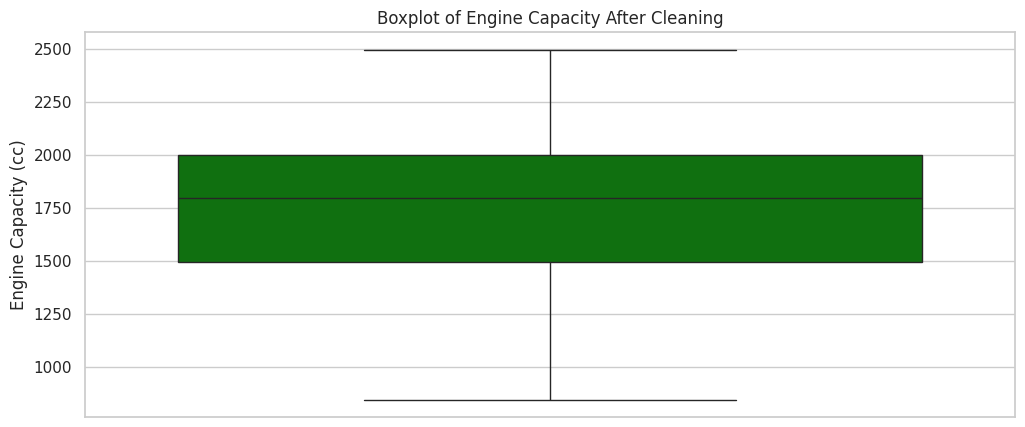

Missing Values After Cleaning:
Product Name            0
Manufacturing Year      0
Price                   0
Time & Date Posted      0
Condition               0
Region                  0
Mileage                 0
Engine Capacity (cc)    0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Processed Dataset
df_cleaned = pd.read_csv("mudah_processed.csv")  # Ensure file exists

# 1 Price Distribution After Cleaning
plt.figure(figsize=(12, 5))
sns.histplot(df_cleaned["Price"], bins=50, color='green', label="After Cleaning", kde=True)
plt.legend()
plt.title("Price Distribution After Cleaning")
plt.xlabel("Price (RM)")
plt.ylabel("Frequency")
plt.show()

# 2 Engine Capacity Distribution After Cleaning
plt.figure(figsize=(12, 5))
sns.histplot(df_cleaned["Engine Capacity (cc)"], bins=50, color='green', label="After Cleaning", kde=True)
plt.legend()
plt.title("Engine Capacity Distribution After Cleaning")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Frequency")
plt.show()

# 3 Boxplot of Price After Cleaning
plt.figure(figsize=(12, 5))
sns.boxplot(df_cleaned["Price"], color='green')
plt.title("Boxplot of Price After Cleaning")
plt.ylabel("Price (RM)")
plt.show()

# 4 Boxplot of Engine Capacity After Cleaning
plt.figure(figsize=(12, 5))
sns.boxplot(df_cleaned["Engine Capacity (cc)"], color='green')
plt.title("Boxplot of Engine Capacity After Cleaning")
plt.ylabel("Engine Capacity (cc)")
plt.show()

# 5 Missing Values After Cleaning
missing_after = df_cleaned.isnull().sum()

# Display missing values
print("Missing Values After Cleaning:")
print(missing_after)


### **LOAD CLEANED DATA**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('mudah_processed.csv')

# Display the first few rows
print(df.head())


                                        Product Name  Manufacturing Year  \
0  Toyota Noah 2.0 Si Wxb 2 Promosi Akhir Tahunrm...                2020   
1  Honda Hr-v 1.8 E Facelift P/shift Fsr57k U/wrt...                2021   
2  M Benz Cla180 1.6 Amg C117 F/lift Cbu Japan Re...                2016   
3     Honda Civic 1.5 Turbo Fl1 Auto Murahrm 161,000                2021   
4              Proton Saga 1.3 Base Line (a)rm 6,800                2008   

    Price Time & Date Posted Condition        Region          Mileage  \
0  139000       Today, 17:36     Recon  Kuala Lumpur    50000 - 54999   
1   80800       Today, 17:36      Used      Selangor    55000 - 59999   
2  109800       Today, 17:36      Used      Selangor    80000 - 84999   
3  161000       Today, 17:36     Recon  Kuala Lumpur      5000 - 9999   
4    6800       Today, 17:35      Used      Selangor  150000 - 159999   

   Engine Capacity (cc)  
0                  1986  
1                  1799  
2                  1595  
